https://coding-bootcamps.notion.site/Holiday-Mood-Tracker-2c46ed1efc938057be5fc3181d44f7f2

https://www.figma.com/slides/w0R7s3AnDZCqXqOWCfRh5Z/Untitled?node-id=1-1313&t=GysCspp4o5eRdJp1-1

In [449]:
#Use drive from google.colab to mount google drive.
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [450]:
#Import the necessary libraries.
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score, roc_curve

In [451]:
#Use pd.read_csv() in order to upload/read the dataset in a local and nonlocal computer.
try:
    df = pd.read_csv('/content/drive/MyDrive/December Code Jam/Daylio_Abid.csv')
except:
    df = pd.read_csv('Daylio_Abid.csv')

In [452]:
#Use the head() method in order to print the first five rows of the dataframe.
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


Code Result:

The entries in the rows of the activities column need to be separated into different user entries.  This issue will be addressed further in the project using the explode() function.

### Data Cleaning/ Preprocessing

In [453]:
#Use the pd.to_datetime() method in order to create a datetime column that displays the full date and time.
df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )

#Use df.drop() in order to drop the other date and time columns because the 'datetime' column contains
#the same information.
not_needed_date_columns = ['full_date', 'time', 'date']
df.drop(columns=not_needed_date_columns, inplace=True)

/tmp/ipython-input-3857308672.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )


Rationale:  In order to create  line charts for EDA that display

information regarding user moods over time, I have decided to set the

'datetime' column as the the index for the datafrane.

In [454]:
#Use the set_index() function in order to set the 'datetime' column as the dataframe index.
df.set_index('datetime', inplace=True)
#Use the sort_index() column in order to sort the index in descending order.
df = df.sort_index(ascending=False)

In [455]:
#Use .index.is_monotic_decreasing in order to verify that the dataframe is arranged in chronological order.
print(df.index.is_monotonic_decreasing)

True


In [456]:
#Use .index.is_monotic_increasing in order to verify that the dataframe is arranged in chronological order.
print(df.index.is_monotonic_increasing)

False


Code Result:  It appears that the dataframe index is sorted in chronological order.

In [457]:
#Use the isna() and sum() methods in order to check the columns in the df dataframe for missing values.
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,47
mood,0


Code Result:  

It appears that there are 47 missing values in activities  

column of the df dataframe.  I have decided to drop these missing values in

the cell below.

In [458]:
#Use the dropna() function to drop the missing values in the df dataframe.
df.dropna(inplace=True)
#Use the isna() and sum() methods in order to double check the df dataframe for missing values.
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,0
mood,0


Code Result:

There are no more missing values noted in the df dataframe.  The missing

values were successfully dropped.

In [459]:
#Use the duplicated() and sum() methods to check for duplicate values in the df dataframe.
df.duplicated().sum()

np.int64(1)

Code Result:  There is 1 duplicate value noted in the df dataframe.  This

duplicate value will be dropped in the cell below.

In [460]:
#Use the drop_duplicates() method in order drop duplicate values from the df dataframe.
df.drop_duplicates(inplace=True)
#Use the duplicated() and sum() methods to double check for duplicate values in the df dataframe.
df.duplicated().sum()

np.int64(0)

In [461]:
#Use the info() method in order to check the data types in the df dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 892 entries, 2021-12-04 21:52:00 to 2018-01-03 12:20:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weekday     892 non-null    object
 1   sub_mood    892 non-null    object
 2   activities  892 non-null    object
 3   mood        892 non-null    object
dtypes: object(4)
memory usage: 34.8+ KB


Code Result:

The columns in the df dataframe appear to have the appropriate data types,

but the weekday, activities, and mood columns will be encoded further in

the project for the purposes of exploratory data analysis (EDA) and machine

learning.

In [462]:
#Use the str.split() method in order to move the '|' dividers from the activities column.
df['activities'] = df['activities'].str.split('|')

In [463]:
#Use the head() method in order to print the first 5 rows of the df dataframe.
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


Code Result: The '|' dividers were successfully removed from the various

activities of the 'activities' column.

In [464]:
### Core Goals

#### Mood Count Barplot (Core Goal)

Core Goal: Create a bar chart showing the frequency of each mood category.

In [465]:
#Use the value_counts() method in order to calculate the total counts in for each category in the
#'mood' column of the df dataframe.  Use reset_index() in order to reset the index.
mood_counts = df['mood'].value_counts().reset_index()
mood_counts.columns = ['mood', 'count']

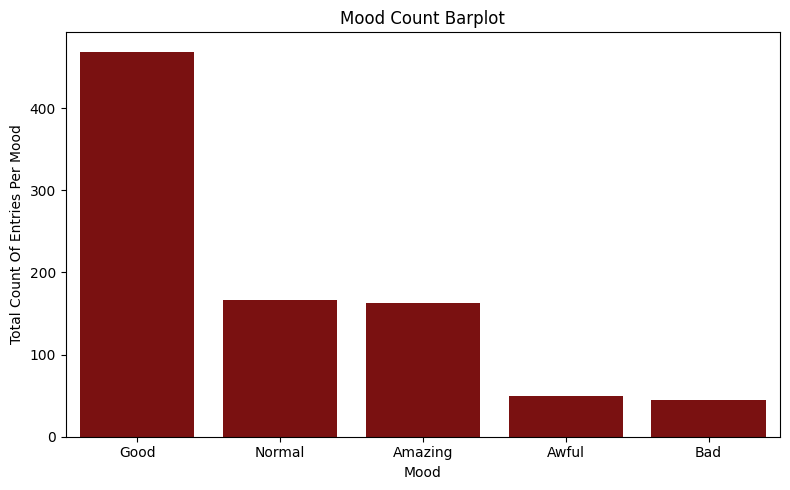

In [466]:
#(Core Goal: A bar chart showing the frequency of each mood category.)
plt.figure(figsize=(8, 5))
plt.title('Mood Count Barplot')
plt.xlabel('Mood')
plt.ylabel('Total Count Of Entries Per Mood')
sns.barplot(data=mood_counts, x='mood', y='count', color='darkred')
plt.savefig('mood_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Chart Conclusion:

According to the barplot, it appears that users report 'Good' as the mood

more than any other mood category and users report 'Bad' as their mood more

than any other mood category.  


Total Counts For Each Mood Category (Sorted From Highest To Lowest Count):

1) Good - 469 Counts

2) Normal - 166 Counts

3) Amazing - 163 Counts

4) Awful - 49 Counts

5) Bad - 45 Counts


#### Good/Bad Average Weekly Mood Counts Over Time (Core Goal)

Core Goal: Create a line chart showing a numeric mood score or mood

category over time.

In [467]:
#Use the copy() method in order to create a copy from the df dataframe that will be used for a resampled dataframe.
df_copy = df.copy()
#Use the resample() and value_counts() method in order to resmple the data as mood counts mood counts per week.
mood_weekly_counts = df_copy.resample('W')['mood'].value_counts().unstack().fillna(0)

#Create a separate dataframe for good and bad weekly mood counts.
good_mood_weekly_counts = mood_weekly_counts[['Amazing', 'Good', 'Normal']]
bad_mood_weekly_counts = mood_weekly_counts[['Bad', 'Awful']]

#Use the rolling() and mean() methods in order to convert the values in the good_mood_weekly_counts and
#bad_mood_weekly counts into rolling mean values.
good_smoothed = good_mood_weekly_counts.rolling(window=7, center=True).mean()
bad_smoothed = bad_mood_weekly_counts.rolling(window=7, center=True).mean()

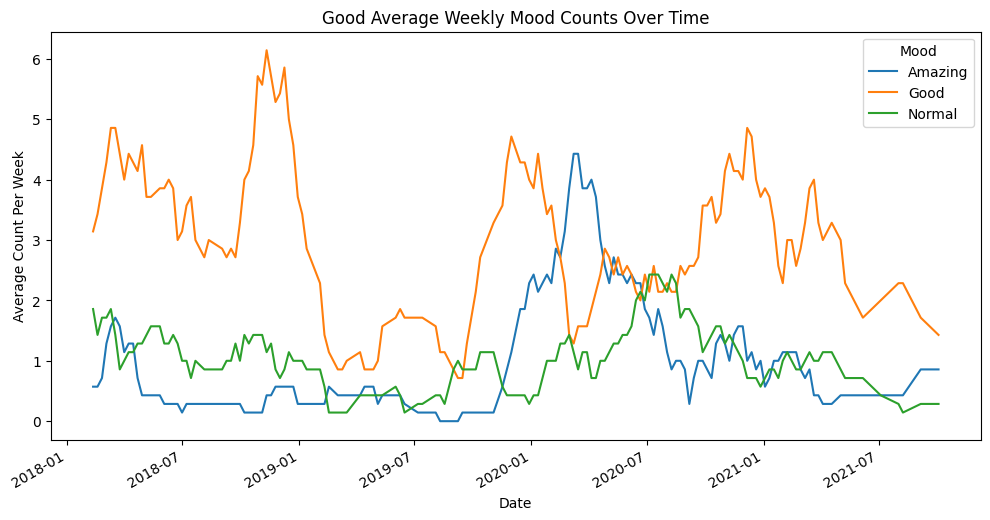

In [468]:
#Use the matplotlib and the plot() method in order to plot the "Good Average Weekly Mood Counts Over Time" line chart.
good_smoothed.plot(figsize=(12,6))
plt.title("Good Average Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('good_mood_linechart.png', dpi=300, bbox_inches='tight')
plt.show()


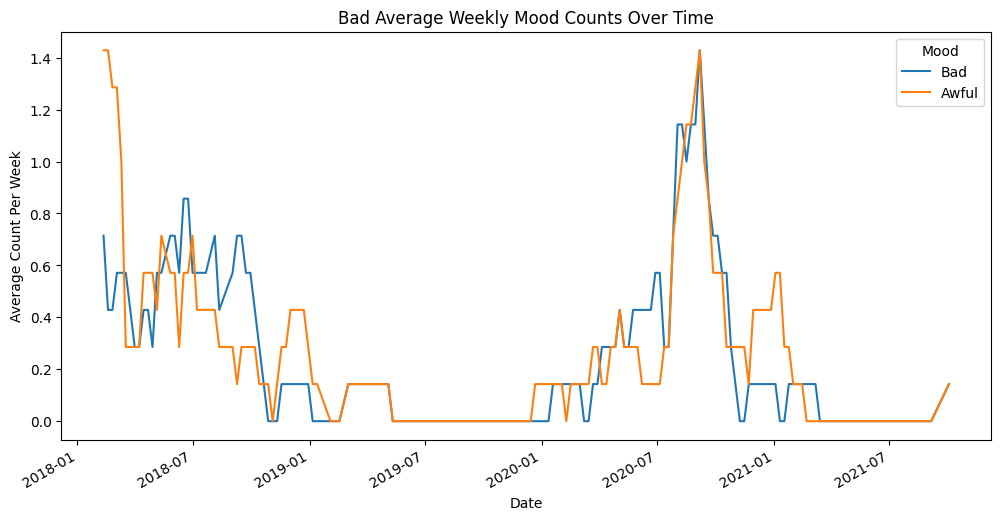

In [469]:
#Use the matplotlib and the plot() method in order to plot the "Bad Average Weekly Mood Counts Over Time" line chart.
bad_smoothed.plot(figsize=(12,6))
plt.title("Bad Average Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('bad_mood_linecharts', dpi=300, bbox_inches='tight')
plt.show()


#### Summary Statistics Core Goal

Core Goal: Include at least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).

In [470]:
#Create a map index for the map for the mood categories with 1 being 'Awful' and 5 Being 'Amazing/
mood_map = {
    'Awful': 1,
    'Bad' : 2,
    'Normal' : 3,
    'Good' : 4,
    'Amazing' : 5
}

#Use the map() method in order to create the 'mood_encoded' column with mapped features.
df['mood_encoded'] = df['mood'].map(mood_map)

In [471]:
#Use the mean() function in order to calculate the average mood score value.
mean_mood_score = df['mood_encoded'].mean()
print(f'Average Mood Score: {mean_mood_score:.2f}')

Average Mood Score: 3.73


Conclusion: It appears that the average mood score for users is: 3.73.  

This average mood score indicates that users on average report moods

between 3 (Normal) and 4 (Good).

In [472]:
#Use the mode() method in order to find the most common mood category.
most_common_mood = df['mood'].mode()
print(f"Most Common Mood Category: {most_common_mood[0]}")

Most Common Mood Category: Good


### Top 10 Most Common Activities Barplot

In [473]:
#Use the explode() method in order to create a dataframe that contains entries in the activities column
#as individual entries instead of list form.
activities_explode_df = df.explode('activities')

#Use the str.strip() and str.lower() methods in order to remove any whitespaces from the activites column
#and convert the text the texts in the column to lowercase.
activities_explode_df['activities'] = activities_explode_df['activities'].str.strip().str.lower()
#Use the head() method to print the first 5 rows of the dataframe.
activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


Code Result:  The activities_explode_df dataframe was created successfully.

In [474]:
#Use the value_counts method in order to get the counts of each user activity.  Use the reset_index() method to reset the index.
activities_sorted = activities_explode_df['activities'].value_counts().reset_index()
#Use .columns to label the columns appropriately.
activities_sorted.columns = ['activities', 'count']
#Use the sort_values() method in order to sort the activities dataframe in descending order.
activities_sorted = activities_sorted.sort_values(by='count', ascending=False)
#Use the head() method in order to create a dataframe that consists of only the top 10 user activities.
top_10_activities = activities_sorted.head(10)

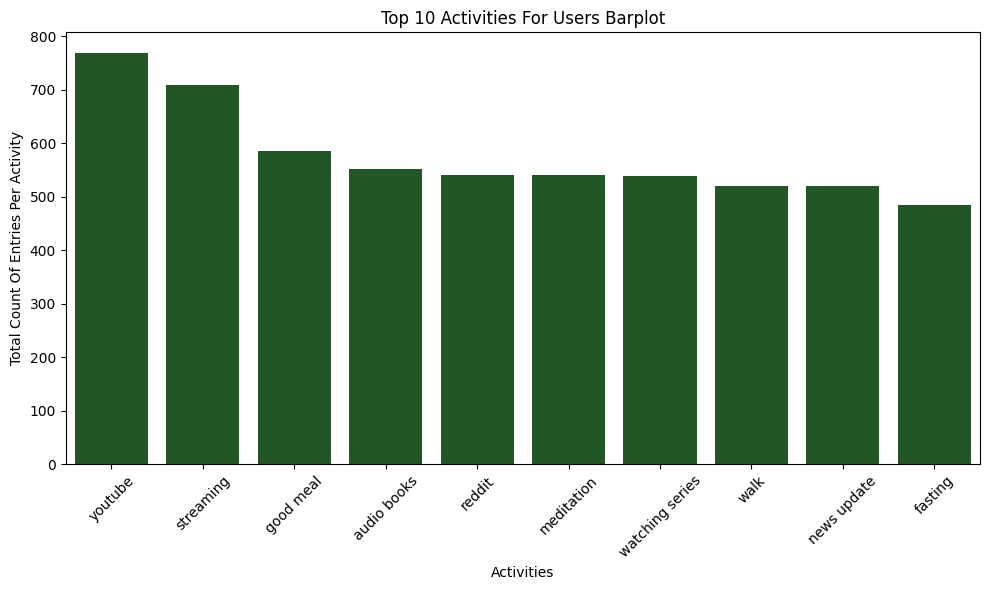

In [475]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
plt.title('Top 10 Activities For Users Barplot')
plt.xlabel('Activities')
plt.ylabel('Total Count Of Entries Per Activity')
sns.barplot(data=top_10_activities, x='activities', y='count', color='#1B5E20')
plt.xticks(rotation=45)
plt.savefig('top_10_activities_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Chart Conclusions:

* The top 10 most popular activities for users mainly consists of: media

based activities (such as YouTube, streaming, and audiobooks) and self care

based activities (such as eating a good meal, meditation, and fasting).

* Media based activities appear to be more popular among users than self

care based activities, with YouTube having a total count of 770 user

entries and Streaming having a total count of 710 user entries.

In [476]:
#Display the top 10 user activities and their counts.
top_10_activities

,activities,count
0,youtube,769
1,streaming,709
2,good meal,586
3,audio books,552
4,reddit,541
5,meditation,540
6,watching series,538
7,walk,520
8,news update,520
9,fasting,484


### Stretch Goals

### Mood Score and Activites Correlation Heatmap (Stretch Goal)

Stretch Goal: Mood vs. Activities Heatmap

In [477]:
#Use conditional indexing in order to filter the activities_sorted dataframe to show activities with medium/ average popularity.
medium_freq_activities = activities_sorted[(activities_sorted['count'] >= 365) & (activities_sorted['count'] <= 405)]
medium_freq_activities.head(3)

,activities,count
11,power nap,400
12,prayer,398
13,penpal,388


In [478]:
#Use the tail() method in order to print the bottom 5 least popular activities among users.
activities_sorted.tail()

,activities,count
52,phd,7
53,party,6
54,hospital,4
55,video editing,3
56,hiking,3


In [479]:
#Create a list of activities to be included in the heatmap.
activities_corr_list = [
    'youtube',
    'streaming',
    'good meal',
    'audio books',
    'reddit',
    'video editing',
    'hiking',
    'party',
    'phd',
    'power nap',
    'penpal',
    'hospital'
    ]

#Use the isin() method in order to create a dataframe for the correlation chart consisting of user rows that only
#have entries in the 'activities' column that are present in activities_corr_list.
activities_corr_df = activities_explode_df[activities_explode_df['activities'].isin(activities_corr_list)]
#Use the pd.get_dummies() to perform one hot encoding on the 'activities' column of the activities_corr_df dataframe.
activities_encoded = pd.get_dummies(activities_corr_df['activities'], dtype=int)
#Use the pd.concat() in order to concatenate the activities encoded and the 'mood_encoded' column of activities_corr_df
#into one dataframe.
activities_mood = pd.concat([activities_encoded, activities_corr_df['mood_encoded']], axis=1)

In [480]:
#Use corr() method to calculate the correlation between the selected user activities and the 'mood_encoded' columnn.
activities_corr = activities_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

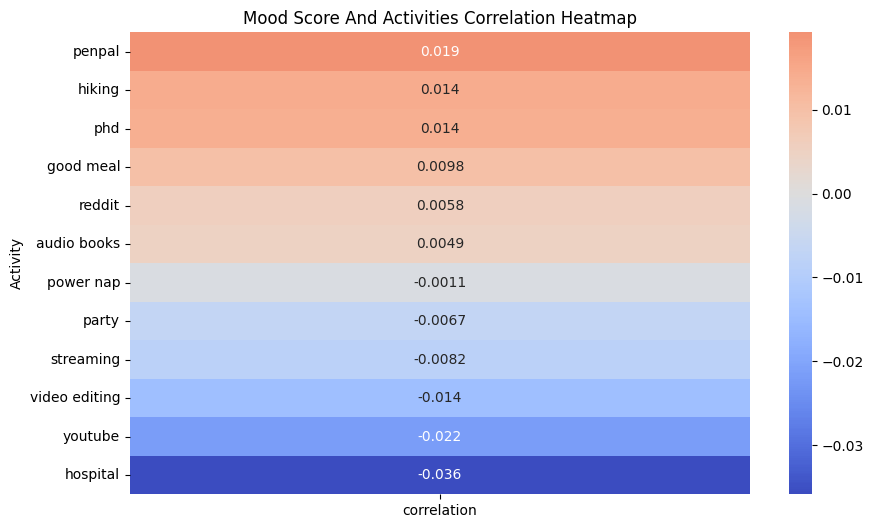

In [481]:
#Use matplotlib and sns.heatmap() in order to plot the 'Mood Score And Activities Correlation Heatmap'.
plt.figure(figsize=(10, 6))
sns.heatmap(
    activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Mood Score And Activities Correlation Heatmap')
plt.ylabel("Activity")
plt.savefig('mood_activites_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Correlation Heatmap Conclusions:

* This heatmap displays the correlation between various user activities and

mood score.  

* From the activities, it appears that self care/ self improvement

activities such as: penpal, hiking, and phd study had the most positive

correlations with mood score.

* Although popular among users, media based activities such as YouTube and

streaming had the most negative correlation with mood score.

* Penpal was the activity with the most positive correlation with mood

score and hospital was the activity with the most negative correlation with

mood score.

* There appears to be no linear correlation with activity popularity and

### Carol Romas Mood Score And Activities Correlation Heatmap

Rationale: I have decided to include a correlation heatmap for user # 7 (Carol Romas).

In [482]:
#Create a dataframe from the activities_explode_df dataframe that consists of a total of 30 users.
user_df = activities_explode_df.sort_index().copy()

n_users = 30

user_df['user_id'] = (
    np.repeat(
        np.arange(1, n_users + 1),
        np.ceil(len(user_df) / n_users)
    )[:len(user_df)]
)

user_df['user_id'].value_counts().sort_index()

#Create a separate dataframe for user # 7.  The data will be used for the correlation heatmap.
user_7 = user_df[user_df['user_id'] == 7]

In [483]:
#Create a dataframe that only consists of user 7's activities.
user_7_activities = user_7[['activities']]

#Create a list of activities to be included in the heatmap.
user_7_activities = [
    'youtube',
    'walk',
    'meditation',
    'streaming',
    'shower',
    'new things',
    'love',
    'family',
    'email',
    'art'
]

#Use the isin() method in order to create a dataframe for the correlation chart consisting of user rows that only
#have entries in the 'activities' column for user 7 that are present in user_7_activities.
user_7_corr_df = user_7[user_7['activities'].isin(user_7_activities)]
#Use the pd.get_dummies() to perform one hot encoding on the 'activities' column of the user_7_activities_encoded dataframe.
user_7_activities_encoded = pd.get_dummies(user_7_corr_df['activities'], dtype=int)
#Use the pd.concat() in order to concatenate the user_7_activities encoded and the 'mood_encoded' column of user_7_corr_df
#into one dataframe.
user_7_mood = pd.concat([user_7_activities_encoded, user_7_corr_df['mood_encoded']], axis=1)

In [484]:
#Use corr() method to calculate the correlation between the user 7's selected  activities and the 'mood_encoded' columnn.
user_7_activities_corr = user_7_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

#### Carol Romas Mood Score And Activities Correlation Heatmap

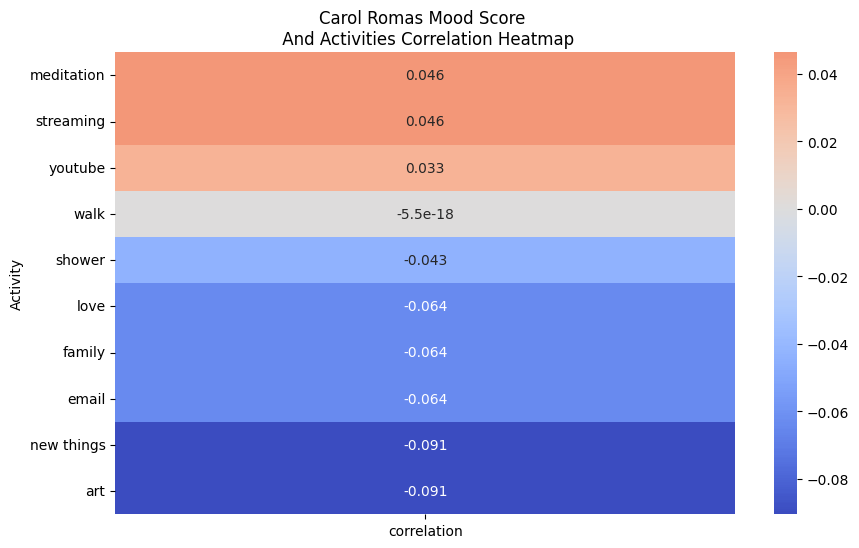

In [485]:
#Use matplotlib and sns.heatmap() in order to plot the 'Carol Romas Mood Score And Activities Correlation Heatmap'.
plt.figure(figsize=(10, 6))
sns.heatmap(
    user_7_activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Carol Romas Mood Score \n And Activities Correlation Heatmap')
plt.ylabel("Activity")

plt.savefig('carol_romas_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Heatmap Conclusion:

It appears that meditation, streaming, and YouTube had the most positive

correlation with Carol Romas' mood score and email, new things, and art had

the most negative correlation with Carol Romas' mood score.

### Good Mood/ Bad Mood Count Per Weekday Bar Charts (Stretch Goal)

Strech Goal: Visualize mood trend by time of day or weekday using grouped line/bar charts

In [486]:
#Create two separate dataframes for users with good mood entries and users with bad mood entries.
df_bad_weekday = df[df['mood_encoded'] <= 2]
df_good_weekday = df[df['mood_encoded'] >= 3]

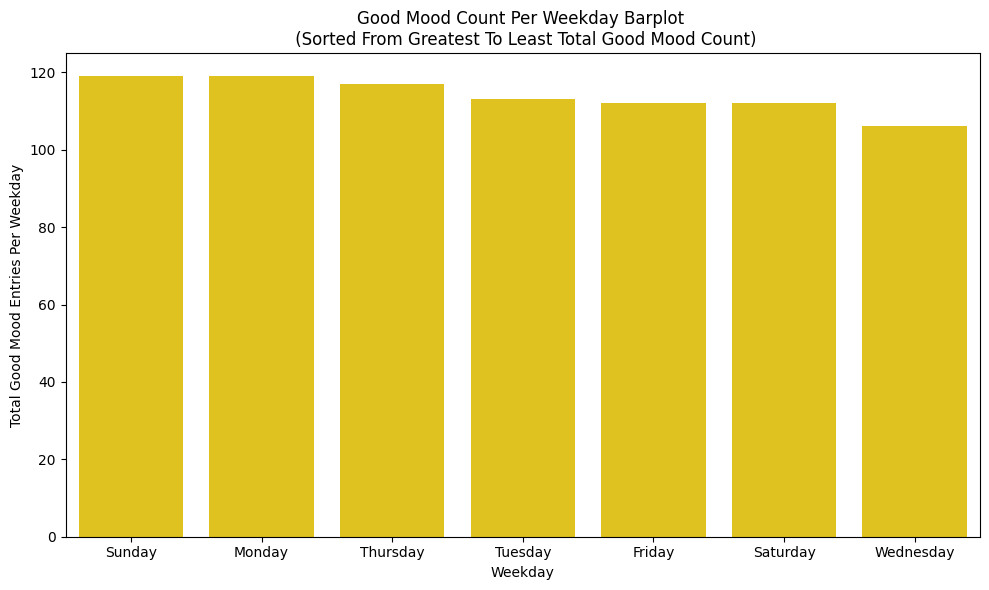

In [487]:
#Use the value_counts() method in order to get a count of good mood entries per weekday.
good_weekday_counts = df_good_weekday['weekday'].value_counts().reset_index()
#Use .columns method in order to label the columns appropriately.
good_weekday_counts.columns = ['weekday', 'count']

#Use matplotlib and sns.barplot() in order to plot the 'Good Mood Count Per Weekday Barplot'.
plt.figure(figsize=(10, 6))
sns.barplot(data=good_weekday_counts, x='weekday', y='count', color='gold')
plt.title('Good Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Good Mood Count)')
plt.ylabel('Total Good Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('good_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Chart Conclusion:

It appears that Sunday had the good mood count, with a total good mood count of: 119.  Wednesday had the lowest good mood count with a count of: 106.

In [488]:
good_weekday_counts

,weekday,count
0,Sunday,119
1,Monday,119
2,Thursday,117
3,Tuesday,113
4,Friday,112
5,Saturday,112
6,Wednesday,106


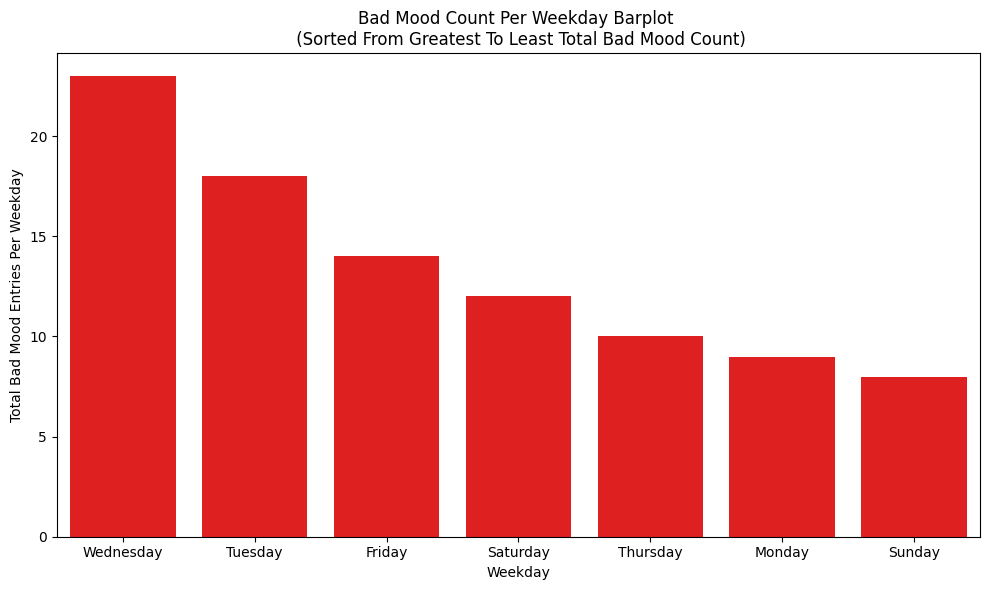

In [489]:
#Use the value_counts() method in order to get a count of bad mood entries per weekday.
bad_weekday_counts = df_bad_weekday['weekday'].value_counts().reset_index()
#Use .columns method in order to label the columns appropriately.
bad_weekday_counts.columns = ['weekday', 'count']

#Use matplotlib and sns.barplot() in order to plot the 'Good Mood Count Per Weekday Barplot'.
plt.figure(figsize=(10, 6))
sns.barplot(data=bad_weekday_counts, x='weekday', y='count', color='red')
plt.title('Bad Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Bad Mood Count)')
plt.ylabel('Total Bad Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('bad_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Chart Conclusion:

It appears that Wednesday had the highest bad mood count with a bad mood

count of: 23.  Sunday had the highest bad mood count with a bad mood count

of: 8.

In [490]:
bad_weekday_counts

,weekday,count
0,Wednesday,23
1,Tuesday,18
2,Friday,14
3,Saturday,12
4,Thursday,10
5,Monday,9
6,Sunday,8


### mood_alert() Function (Stretch goal)

Stretch Goal: Add basic anomaly or pattern detection (e.g., highlight unusual mood drops or consistent weekly patterns).

In [491]:
#Create a function that prints out a message if a user is having a good mood or a bad mood.
def mood_alert(df, mood_score_column, row_num):
  mood = df.iloc[row_num][mood_score_column]

  mood = pd.to_numeric(mood, errors='coerce')

  if pd.isna(mood):
    print("Mood value is missing or invalid")
  elif mood <= 2:
    print(f"I noticed you're having a rough day. Have you tried doing anything to improve your mood?")
  elif mood >= 3:
    print(f"I noticed you're in a good mood today. Keep up the good work!")
  else:
    print("Mood score out of expected range.")

In [492]:
#Use the mood_alert() function to print out a mood alert message for the user in row # 4.
mood_alert(user_df, 'mood_encoded', 4)

I noticed you're in a good mood today. Keep up the good work!


In [493]:
#Use the mood_alert() function to print out a mood alert message for the user in row # 19.
mood_alert(user_df, 'mood_encoded', 19)

I noticed you're having a rough day. Have you tried doing anything to improve your mood?


### Encoding Target And Features For Machine Learning

In [494]:
#Use the copy() method in order to create a copy dataframe of activities_explode_df that will be used to train
#the machine learning models.
ml_df = activities_explode_df.copy()


In [495]:
#Create a map to encode the mood categories in the mood column for a binary classification task, with moods: 'Awful' and 'Bad'
#being the '0' class and moods: 'Good', 'Normal', and 'Amazing' being the '1' class.
mood_binary_map = {
    'Awful': 0,
    'Bad' : 0,
    'Good': 1,
    'Normal' : 1,
    'Amazing': 1
}

#Use the map() function in order to encode the 'mood' column of the ml_df dataframe.  This column will be used as the
#target column for the models.
ml_df['mood'] = ml_df['mood'].map(mood_binary_map)

In [496]:
#Use the drop() method in order to drop the 'sub_mood' and 'mood_encoded' columns because
#these columns will cause target leakage.
ml_df = ml_df.drop(['sub_mood', 'mood_encoded'], axis=1)

In [497]:
#Create a index in order to encode the days of the week.
weekday_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}

#Use the map() column to encode the 'weekday' column.
ml_df['weekday'] = ml_df['weekday'].map(weekday_map)

In [498]:
#Use the value_counts() and to_dict() columns to create a frequency map to perform frequency
#encoding on the 'activties' column of the ml_df dataframe.
freq_map = ml_df['activities'].value_counts().to_dict()

#Use the map() to create the 'activities_freq' encoded column that consists of values encoded
#using frequency encoding.
ml_df['activities_freq'] = ml_df['activities'].map(freq_map)

### Morning And Evening Mood Score Distribution Charts (Stretch Goal)

Stretch Goal: Vizualize mood trend by time of day or weekday using grouped line/bar charts.

In [499]:
#Use index.hour in order to create the 'hour' column in the df dataframe.
df['hour'] = df.index.hour

#Use conditional filtering to create dataframes that contain user morning and evening values.
morning_df = df[(df['hour'] >= 6) & (df['hour'] < 12)]
evening_df = df[(df['hour'] >= 17) & (df['hour'] <= 23)]
morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)
evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)

/tmp/ipython-input-358863567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)
/tmp/ipython-input-358863567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)


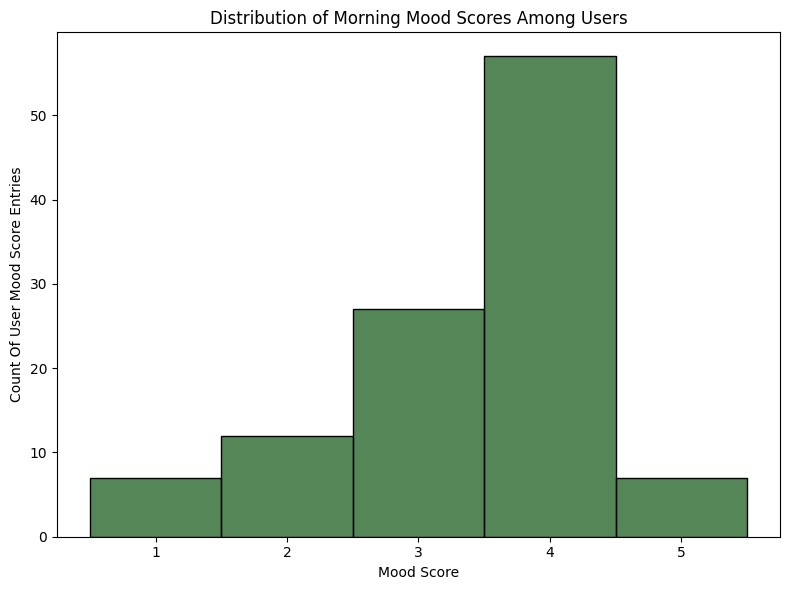

In [500]:
#Use matplotlib and sns.histplot() in order to create the 'Distribution of Morning Mood Scores Among Users'
#histogram.
plt.figure(figsize=(8, 6))
sns.histplot(
    data=morning_df['mood_encoded'],
    discrete=True,
    color='#1B5E20'
    )

plt.title('Distribution of Morning Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of User Mood Score Entries')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

Code Result:

It appears that the most common morning mood score for users is '4' (Good),

with a total count of: 57 entries.

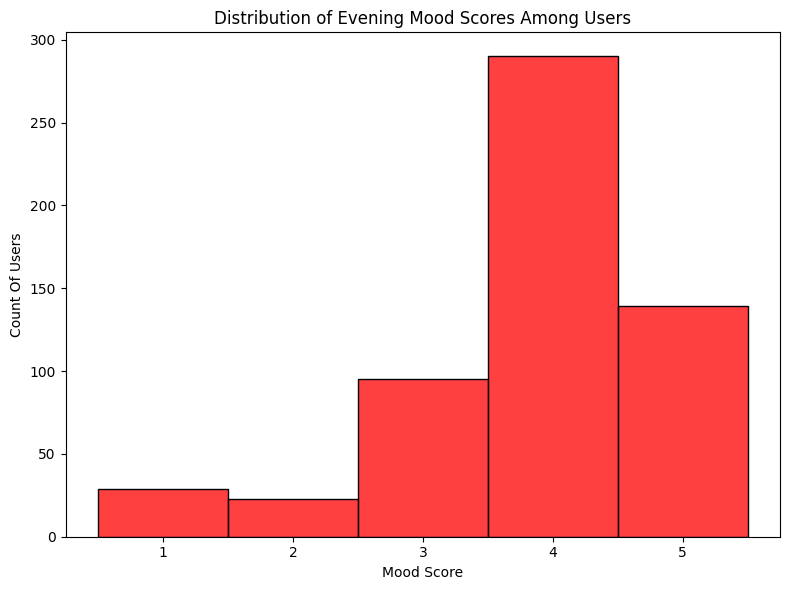

In [501]:
#Use matplotlib and sns.histplot() in order to create the 'Distribution of Morning Mood Scores Among Users'
#histogram.
plt.figure(figsize=(8, 6))
sns.histplot(
    data=evening_df['mood_encoded'],
    discrete=True,
    color='red'
    )
plt.title('Distribution of Evening Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of Users')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()


Code Result:

It appears that the most common evening mood score for users is '4' (Good),

with a total count of: 290 entries.  It also, appears that there are

overall more 'Good' mood score entries among users in the evening than in

the morning.

### Examining Class Imbalance

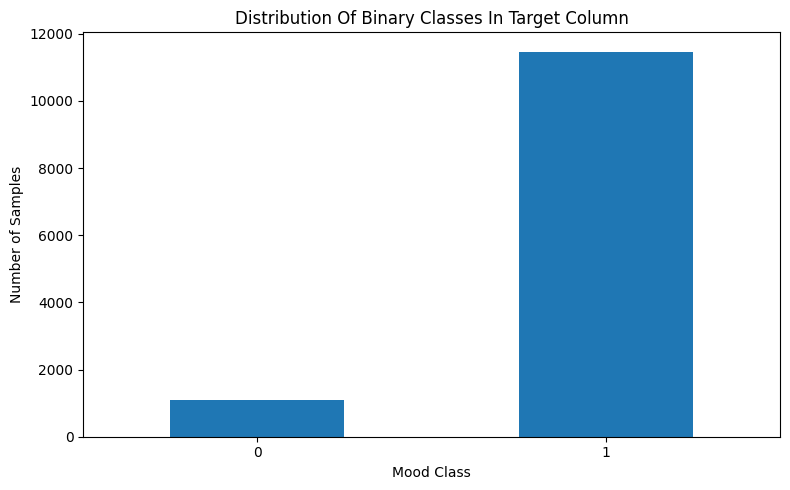

In [502]:
mood_counts = ml_df['mood'].value_counts().sort_index()
mood_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Distribution Of Binary Classes In Target Column")
plt.xlabel("Mood Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [503]:
zero_counts = (ml_df['mood'] == 0).sum()

print(f"'0' (Bad Mood) Class Counts: {zero_counts}")

'0' (Bad Mood) Class Counts: 1089


In [504]:
one_counts = (ml_df['mood'] == 1).sum()

print(f"'1' (Good mood) Class Counts: {one_counts}")

'1' (Good mood) Class Counts: 11469


Class Imbalance Chart Result:

It appears that there is major class imbalance with the '1' class (majority

class) greatly outnumbering the '0' class (minority class).  To address

this class imbalance issue, I have trained the model in the project with

upsampled features and I will adjust the threshold on the model with the

best scoring metrics.

### Feature Upsampling

In [505]:
state = np.random.seed(12345)
y = ml_df['mood']

X = ml_df[['activities_freq', 'weekday']]

In [506]:
def upsample(features, target):
  features_zeros = features[target ==0]
  features_ones = features[target == 1]
  target_zeros = target[target == 0]
  target_ones = target[target == 1]

  n_zeros = len(target_zeros)
  n_ones = len(target_ones)

  repeat = n_ones // n_zeros

  features_upsampled = pd.concat([features_zeros] * repeat + [features_ones])
  target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])

  features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=state)

  return features_upsampled, target_upsampled

In [507]:
X_upsampled, y_upsampled = upsample(X, y)

In [508]:
X_train_upsampled, X_vt_upsampled, y_train_upsampled, y_vt_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.4, random_state=state)

In [509]:
X_valid_upsampled, X_test_upsampled, y_valid_upsampled, y_test_upsampled = train_test_split(X_vt_upsampled, y_vt_upsampled, test_size=0.5, random_state=state)

### Threshold Adjustment Function

In [510]:
thresholds = np.arange(0.25, 0.55, 0.02)

In [511]:
#Create function to adjust the threshold.
def custom_predict(model, X, threshold):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    return y_pred

### Prediction Results Function

In [512]:
def prediction_results(model, X, y, dataset_name="Dataset", average='macro'):
    y_pred = model.predict(X)

    f1 = f1_score(y, y_pred, average=average)

    print(f"\n{dataset_name} Results")
    print("-" * 30)
    print(f"F1 Score ({average}): {f1:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))

    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    return f1


### Logisitc Regression Model

In [513]:
lr = LogisticRegression()

lr.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression()

In [514]:
lr_train_pred_f1 = prediction_results(lr, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.4482

Confusion Matrix:
[[ 429 1771]
 [ 461 1811]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.20      0.28      2200
           1       0.51      0.80      0.62      2272

    accuracy                           0.50      4472
   macro avg       0.49      0.50      0.45      4472
weighted avg       0.49      0.50      0.45      4472



### Random Forest Classifier

In [515]:
rf = RandomForestClassifier(random_state=state)

rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "max_features": ["sqrt", 0.5]
}

In [516]:
rf_gsearch = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_gsearch.fit(X_train_upsampled, y_train_upsampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [200, 400]},
             scoring='f1_macro', verbose=1)

In [517]:
print(f"Random Forest Classifier Model Best Hyperparameters: {rf_gsearch.best_params_}")
print(f"Random Forest Classifier Model Best F1 Score: {rf_gsearch.best_score_:.2f}")

Random Forest Classifier Model Best Hyperparameters: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classifier Model Best F1 Score: 0.60


In [518]:
rf = RandomForestClassifier(
    max_depth=20,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=state
)

rf.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(max_depth=20, max_features=0.5, n_estimators=200)

In [519]:
rf_valid_pred_f1 = prediction_results(rf, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')



Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.5933

Confusion Matrix:
[[1217  983]
 [ 831 1441]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      2200
           1       0.59      0.63      0.61      2272

    accuracy                           0.59      4472
   macro avg       0.59      0.59      0.59      4472
weighted avg       0.59      0.59      0.59      4472



In [520]:
for t in thresholds:
    rf_us_valid_pred = custom_predict(rf, X_valid_upsampled, t)
    f1 = f1_score(y_valid_upsampled, rf_us_valid_pred, average="macro")
    print(f"threshold={t:.2f}, macro_f1={f1:.3f}")

threshold=0.25, macro_f1=0.404
threshold=0.27, macro_f1=0.431
threshold=0.29, macro_f1=0.438
threshold=0.31, macro_f1=0.447
threshold=0.33, macro_f1=0.460
threshold=0.35, macro_f1=0.495
threshold=0.37, macro_f1=0.509
threshold=0.39, macro_f1=0.518
threshold=0.41, macro_f1=0.524
threshold=0.43, macro_f1=0.555
threshold=0.45, macro_f1=0.570
threshold=0.47, macro_f1=0.575
threshold=0.49, macro_f1=0.592
threshold=0.51, macro_f1=0.588
threshold=0.53, macro_f1=0.586
threshold=0.55, macro_f1=0.582


In [521]:
rf_valid_predict_tr = custom_predict(rf, X_valid_upsampled, 0.53)

In [522]:
rf_tr_valid_f1 = f1_score(y_valid_upsampled, rf_valid_predict_tr, average='macro')
print(f"Random Forest Classifier (Upsampled + Threshold Adjustment) Validation F1 Score: {rf_tr_valid_f1:.2f}")

Random Forest Classifier (Upsampled + Threshold Adjustment) Validation F1 Score: 0.59


In [523]:
rf_tr_valid_cm = confusion_matrix(y_valid_upsampled, rf_valid_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Validation Confusion Matrix:")
print(rf_tr_valid_cm)

Random Forest Classifier (Upsampled + Threshold Adjustment) Validation Confusion Matrix:
[[1432  768]
 [1078 1194]]


In [524]:
rf_tr_valid_cr = classification_report(y_valid_upsampled, rf_valid_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Train Classification Report:")
print(rf_tr_valid_cr)

Random Forest Classifier (Upsampled + Threshold Adjustment) Train Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61      2200
           1       0.61      0.53      0.56      2272

    accuracy                           0.59      4472
   macro avg       0.59      0.59      0.59      4472
weighted avg       0.59      0.59      0.59      4472



### Gradient Boost Classifier Model

In [525]:
gbc = GradientBoostingClassifier(random_state=state)

In [526]:
gbc_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "subsample": [0.8, 1.0],
    "max_features": [None, "sqrt"],
}

In [527]:
gbc_gsearch = GridSearchCV(
    estimator=gbc,
    param_grid=gbc_param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
    )

gbc_gsearch.fit(X_train_upsampled, y_train_upsampled)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [528]:
print(f"Gradient Boost Classifier Model Best Hyperparameters: {gbc_gsearch.best_params_}")
print(f"Gradient Boost Classifier Model Best F1 Score: {gbc_gsearch.best_score_:.2f}")

Gradient Boost Classifier Model Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}
Gradient Boost Classifier Model Best F1 Score: 0.60


In [529]:
gbc = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    max_features=None,
    min_samples_leaf=10,
    min_samples_split=10,
    n_estimators=200,
    subsample=1.0,
    random_state=state)

gbc.fit(X_train_upsampled, y_train_upsampled)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, subsample=0.8)

In [533]:
gbc_valid_pred_f1 = prediction_results(gbc, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.5791

Confusion Matrix:
[[1181 1019]
 [ 858 1414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      2200
           1       0.58      0.62      0.60      2272

    accuracy                           0.58      4472
   macro avg       0.58      0.58      0.58      4472
weighted avg       0.58      0.58      0.58      4472


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.5791

Confusion Matrix:
[[1181 1019]
 [ 858 1414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      2200
           1       0.58      0.62      0.60      2272

    accuracy                           0.58      4472
   macro avg       0.58      0.58      0.58      4472
weighted avg       0.58      0.58      0.58      4472



### XG Boost Classifier Model

In [531]:
xgbc = XGBClassifier(random_state=state)

In [532]:
xgbc_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [2, 3],
    "learning_rate": [0.05, 0.1],
    "min_child_weight": [1, 5],
    "subsample": [0.8, 1.0],
    "gamma": [0, 0.3],
    "reg_lambda": [1.0, 5.0],
    "scale_pos_weight": [1, 5]
}

In [437]:
xgbc_gsearch = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

xgbc_gsearch.fit(X_train_upsampled, y_train_upsampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.3], 'learning_rate': [0.05, 0.1],
                         'max_depth': [2, 3], 'min_child_weight': [1, 5],
                         'n_estimators': [200, 400], 'reg_lambda': [1.0, 5.0],
                         'scale_pos_weight': [1, 5], 'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [438]:
print(f"XgBoost Classifier Model Best Hyperparameters: {xgbc_gsearch.best_params_}")
print(f"XGBoost Classifier Model Best Score: {xgbc_gsearch.best_score_:.2f}")

XgBoost Classifier Model Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 1.0, 'scale_pos_weight': 1, 'subsample': 1.0}
XGBoost Classifier Model Best Score: 0.60


In [439]:
xgbc = XGBClassifier(
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    n_estimators=200,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=1.0,
    random_state=state
)

xgbc.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [440]:
xgbc_valid_pred_f1 = prediction_results(xgbc, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.5875

Confusion Matrix:
[[1141 1059]
 [ 774 1498]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.55      2200
           1       0.59      0.66      0.62      2272

    accuracy                           0.59      4472
   macro avg       0.59      0.59      0.59      4472
weighted avg       0.59      0.59      0.59      4472



### Choosing The Best Model (Random Forest Classifier)

In [441]:
rf_test_pred_f1 = prediction_results(rf, X_test_upsampled, y_test_upsampled, dataset_name="Upsampled Test Set", average='macro')


Upsampled Test Set Results
------------------------------
F1 Score (macro): 0.6047

Confusion Matrix:
[[1229  894]
 [ 868 1481]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      2123
           1       0.62      0.63      0.63      2349

    accuracy                           0.61      4472
   macro avg       0.60      0.60      0.60      4472
weighted avg       0.61      0.61      0.61      4472



In [442]:
for t in thresholds:
    rf_us_test_pred = custom_predict(rf, X_test_upsampled, t)
    f1 = f1_score(y_test_upsampled, rf_us_test_pred, average="macro")
    print(f"threshold={t:.2f}, macro_f1={f1:.3f}")

threshold=0.25, macro_f1=0.421
threshold=0.27, macro_f1=0.439
threshold=0.29, macro_f1=0.447
threshold=0.31, macro_f1=0.460
threshold=0.33, macro_f1=0.475
threshold=0.35, macro_f1=0.520
threshold=0.37, macro_f1=0.538
threshold=0.39, macro_f1=0.554
threshold=0.41, macro_f1=0.558
threshold=0.43, macro_f1=0.582
threshold=0.45, macro_f1=0.595
threshold=0.47, macro_f1=0.596
threshold=0.49, macro_f1=0.604
threshold=0.51, macro_f1=0.598
threshold=0.53, macro_f1=0.592
threshold=0.55, macro_f1=0.582


In [534]:
rf_test_predict_tr = custom_predict(rf, X_test_upsampled, 0.53)

In [535]:
rf_tr_test_f1 = f1_score(y_test_upsampled, rf_test_predict_tr, average='macro')
print(f"Random Forest Classifier (Upsampled + Threshold Adjustment) Test F1 Score: {rf_tr_valid_f1:.2f}")

Random Forest Classifier (Upsampled + Threshold Adjustment) Test F1 Score: 0.59


In [445]:
rf_tr_test_cm = confusion_matrix(y_test_upsampled, rf_test_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Test Confusion Matrix:")
print(rf_tr_test_cm)

Random Forest Classifier (Upsampled + Threshold Adjustment) Test Confusion Matrix:
[[1426  697]
 [1123 1226]]


In [446]:
rf_tr_test_cr = classification_report(y_test_upsampled, rf_test_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Test Set Classification Report:")
print(rf_tr_valid_cr)

Random Forest Classifier (Upsampled + Threshold Adjustment) Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61      2200
           1       0.61      0.53      0.56      2272

    accuracy                           0.59      4472
   macro avg       0.59      0.59      0.59      4472
weighted avg       0.59      0.59      0.59      4472



In [447]:
def model_roc_auc(model, X_test, y_test):
    model_y_pred_proba = model.predict_proba(X_test)
    model_y_pred_proba = model_y_pred_proba[:, 1]
    model_roc_auc = roc_auc_score(y_test, model_y_pred_proba)

    return model_roc_auc

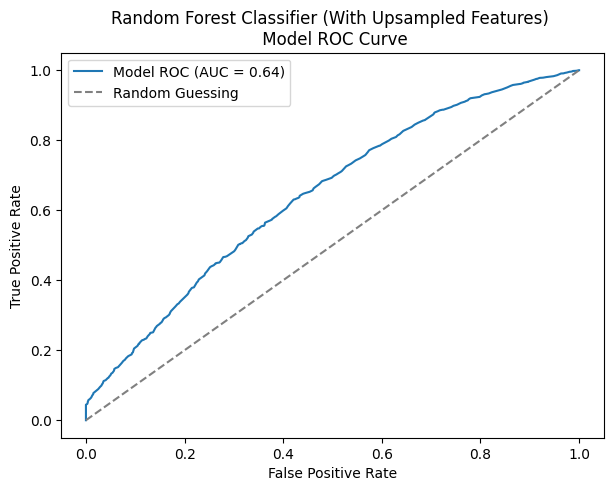

In [448]:
#Use the previously created model_roc_auc() function to calculate ROC-AUC score for
#the Random Forest CLassifier model.
rf_auc = model_roc_auc(rf, X_test_upsampled, y_test_upsampled)
#Use the predict_proba() method in order to make a prediction of the test set.
rf_y_pred_proba = rf.predict_proba(X_test_upsampled)[:, 1]

#Use the roc_curve() method in order to get the fpr (False Positive Rate),
#tpr(True Positive Rate), and the thresholds for the model.  The variables
#will be used to plot the roc_curve.
fpr, tpr, thresholds = roc_curve(y_test_upsampled, rf_y_pred_proba)

#Use matplotlib in order to plot the ROC Curve.
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Model ROC (AUC = {rf_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier (With Upsampled Features) \n Model ROC Curve')
plt.legend()
plt.savefig('rf_classifier_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

ML Slide Text:

* This model predicts whether a user will have an overall good mood or bad mood based on the available dataset features: activitiy frequency and weekday.

* Random Forest Classifier Model F1 Score: 0.60

* Random Forest Classifier Model Precision Score: 0.64

* Random Forest Classifier Model Recall Score: 0.54